# Hough Transform to detect vehicles

In [1]:
from typing import Union
from datetime import datetime, timedelta
import warnings

import numpy as np
import pandas as pd
from scipy import signal
from scipy.ndimage import gaussian_filter
import sklearn
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import torch
import torch.nn.functional as F
import cv2

from src import helper, dasly

In [3]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 103015',
    # end='20230628 103115',
    duration=60
)

Welcome to Dasly!
7 files, from 103014 to 103114


In [9]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 103015',
    # end='20230628 103115',
    duration=60
)

Welcome to Dasly!
7 files, from 103014 to 103114


Heatmap with vmin -1.21e+05, vmax 1.21e+05


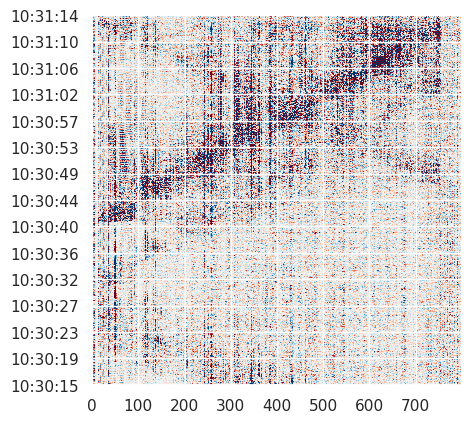

In [10]:
das.heatmap()

## 1. Gaussian filter

Heatmap with vmin -467, vmax 467


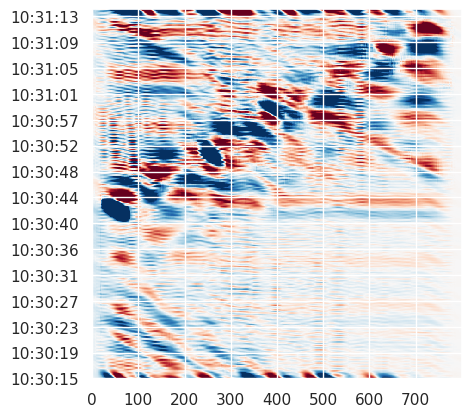

In [30]:
das.reset()
das.sample(100)
# das.convolve(90, 95, 15)
das.convolve(-95, -90, 15)
das.heatmap()

## 2. Grey filter
(to fit with canny algorithm)

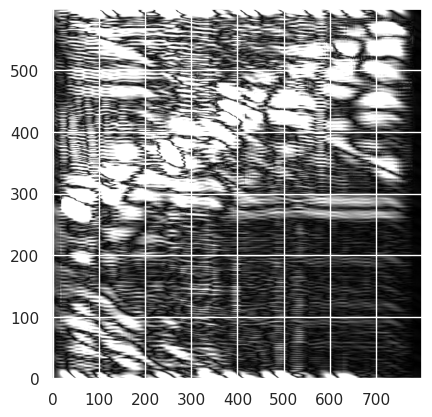

In [32]:
image = das.signal.to_numpy()
# Canny needs input as 8-bit unsigned integer 
scaled_image = cv2.convertScaleAbs(image)
plt.imshow(
    scaled_image,
    cmap='gray',
    origin='lower',
    aspect=scaled_image.shape[1] / scaled_image.shape[0]
);

## 3. Canny edge detection

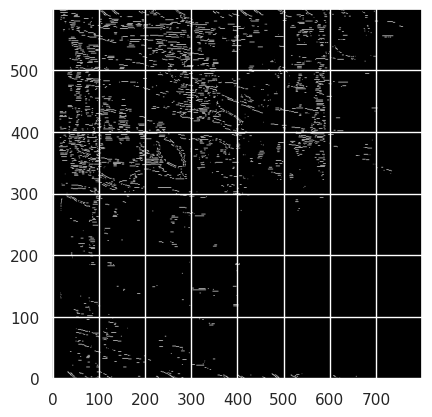

In [33]:
threshold1 = 800
threshold2 = 800
edges = cv2.Canny(scaled_image, threshold1, threshold2)
plt.imshow(
    edges,
    cmap='gray',
    origin='lower',
    aspect=edges.shape[1] / edges.shape[0]
);

## 4. Hough transform

In [50]:
rho = 3
theta = np.pi / 360
# threshold = 520
threshold = 280
lines = cv2.HoughLines(edges, rho, theta, threshold)
print(len(lines))

1


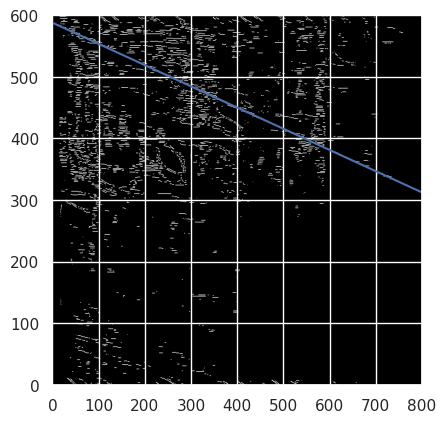

In [51]:
plt.imshow(
    edges,
    cmap='gray',
    origin='lower',
    aspect=edges.shape[1] / edges.shape[0]
);

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    plt.plot([x1, x2], [y1, y2])

plt.xlim(0, edges.shape[1])
plt.ylim(0, edges.shape[0]);